# Food-101 Pizza & Steak : Binary Classification Using CNN

In this project , we are going to classify the images of pizza and steak from food 101 dataset using Tensorflow

In [5]:
# Import libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


#Get the data

In [6]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2024-02-26 20:39:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.207, 108.177.12.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   179MB/s    in 0.6s    

2024-02-26 20:39:55 (179 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [7]:
# Unzip the file

import zipfile

unzip_file =zipfile.ZipFile("pizza_steak.zip")
unzip_file.extractall()
unzip_file.close()

## Inspect the data

In [8]:
!ls pizza_steak/

test  train


In [9]:
!ls pizza_steak/train/

pizza  steak


### Walk through pizza_steak directory  and list number of files

In [10]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"there is {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there is 2 directories and 0 images in pizza_steak
there is 2 directories and 0 images in pizza_steak/test
there is 0 directories and 250 images in pizza_steak/test/pizza
there is 0 directories and 250 images in pizza_steak/test/steak
there is 2 directories and 0 images in pizza_steak/train
there is 0 directories and 750 images in pizza_steak/train/pizza
there is 0 directories and 750 images in pizza_steak/train/steak


### We need  to visualize our images but first we need to get the class names programmatically

In [11]:
import pathlib

path_dir = pathlib.Path("pizza_steak/train")

# Create a list of class_names from the subdirectories in the train_folder

class_names = np.array(sorted(item.name for item in path_dir.glob("*")))

print(class_names)

['pizza' 'steak']


### Visualize image

In [12]:
def rand_image(target_dir,target_class):

  import random

  #Setup the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(img.shape)



(512, 512, 3)


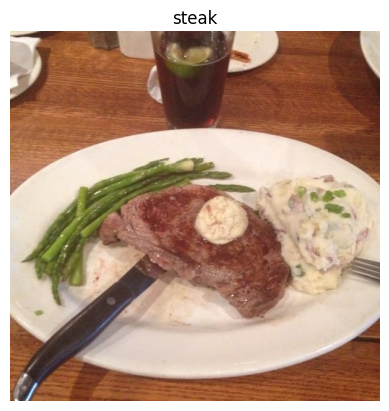

In [13]:
rand_image(target_dir="pizza_steak/train/",
           target_class="steak")

(512, 382, 3)


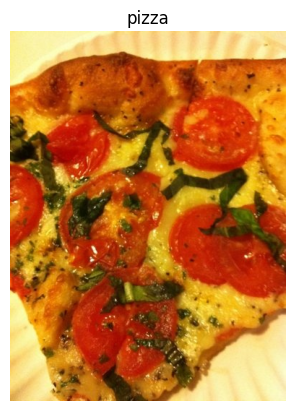

In [14]:
rand_image(target_dir="pizza_steak/train/",target_class="pizza")

# Data Preprocessing

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Preprocess data (get all of the pixel values between 0/1 (Noramlization)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our directories

train_dir= "pizza_steak/train"
test_dir = "pizza_steak/test"

# turn our data into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=True)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size =(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=True)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Create a CNN model

In [16]:
tf.random.set_seed(42)


# Create the model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)))
model.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

# Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model

history=model.fit(train_data,
          epochs=5,
          steps_per_epoch =len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))



Epoch 1/5
47/47 [==============================] - 117s 2s/step - loss: 0.6390 - accuracy: 0.6247 - val_loss: 0.4857 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 114s 2s/step - loss: 0.4952 - accuracy: 0.7853 - val_loss: 0.4116 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 114s 2s/step - loss: 0.4595 - accuracy: 0.7960 - val_loss: 0.3876 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 115s 2s/step - loss: 0.4330 - accuracy: 0.8100 - val_loss: 0.3852 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 115s 2s/step - loss: 0.4173 - accuracy: 0.8240 - val_loss: 0.3415 - val_accuracy: 0.8520


## Plot the loss curve

In [17]:
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss))

  plt.figure(figsize=(10,7))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

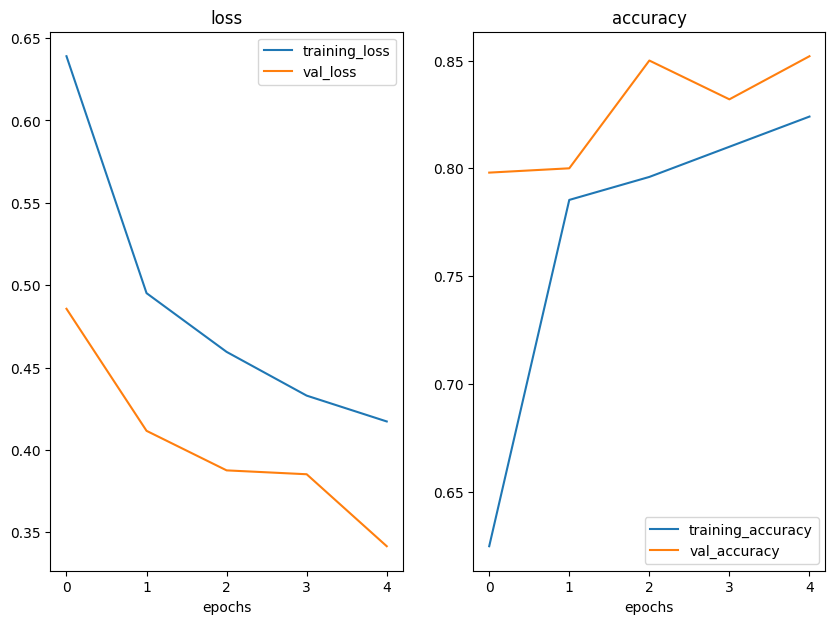

In [18]:
plot_loss_curve(history=history)

### From the loss curve and the accuracy curve we can see that our model is overfitting so we need to reduce it (**regularization**) with Data augmentation

In [19]:
# Data augmenatation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             rotation_range=0.2,
                                             width_shift_range=0.2, # move the image around on the x-axis
                                             height_shift_range=0.3, # move the image around on the y_axis
                                             horizontal_flip=True)


train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.



Here as we can see i changed only the training data because  Data augmentation is usually only performed on the training data

In [20]:
# Create a new CNN model

model2 = tf.keras.models.clone_model(model) # Use the same architecture like the first model

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [25]:
# Compile the model
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model

history2=model2.fit(train_data_augmented,
          epochs=5,
          steps_per_epoch =len(train_data_augmented),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 124s 3s/step - loss: 0.5035 - accuracy: 0.7733 - val_loss: 0.3864 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 138s 3s/step - loss: 0.4754 - accuracy: 0.7800 - val_loss: 0.3547 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 123s 3s/step - loss: 0.4507 - accuracy: 0.7947 - val_loss: 0.3240 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 123s 3s/step - loss: 0.4348 - accuracy: 0.8060 - val_loss: 0.3184 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 123s 3s/step - loss: 0.4289 - accuracy: 0.8020 - val_loss: 0.3209 - val_accuracy: 0.8760


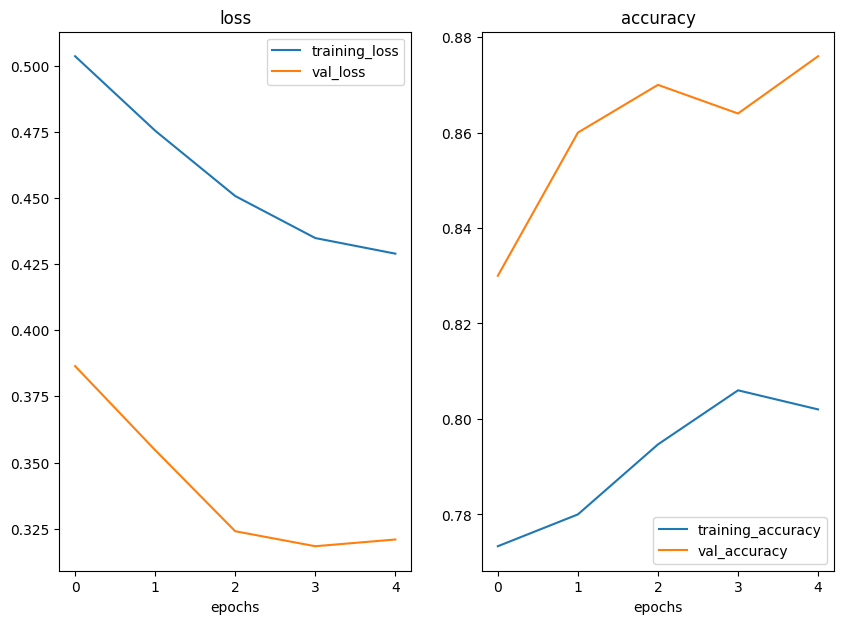

In [26]:
plot_loss_curve(history2)

So as we can see that our new model is performing better than the first model

# Evaluate the model

In [28]:
model2.evaluate(test_data)

16/16 [==============================] - 22s 1s/step - loss: 0.3209 - accuracy: 0.8760


[0.3209087550640106, 0.8759999871253967]

After evaulating the model now we need to make some predictions on real life images


In [52]:
# Make some predictions

def load_and_pred(model,filename,class_name):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img , size=[224,224])
  img = img/255.

  prediction = model.predict(tf.expand_dims(img,axis=0))
  title = class_name[int(tf.round(prediction))]
  img = mpimg.imread(filename)
  plt.imshow(img)
  print(prediction)

  plt.title(title)
  plt.axis("off")

### Downloading images for prediction

In [59]:
!wget https://raw.githubusercontent.com/Anasbendahmane/Food101---Pizza-Steak/master/images/pizza/pizza5.jpeg
!wget https://raw.githubusercontent.com/Anasbendahmane/Food101---Pizza-Steak/master/images/pizza/pizza1.jpeg
!wget https://raw.githubusercontent.com/Anasbendahmane/Food101---Pizza-Steak/master/images/steak/steak8.jpg
!wget https://raw.githubusercontent.com/Anasbendahmane/Food101---Pizza-Steak/master/images/steak/steak2.jpg

--2024-02-26 22:56:47--  https://raw.githubusercontent.com/Anasbendahmane/Food101---Pizza-Steak/master/images/pizza/pizza5.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13126 (13K) [image/jpeg]
Saving to: ‘pizza5.jpeg’

pizza5.jpeg         100%[===================>]  12.82K  --.-KB/s    in 0s      

2024-02-26 22:56:47 (86.1 MB/s) - ‘pizza5.jpeg’ saved [13126/13126]

--2024-02-26 22:56:47--  https://raw.githubusercontent.com/Anasbendahmane/Food101---Pizza-Steak/master/images/pizza/pizza1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response..

1/1 [==============================] - 0s 72ms/step
[[0.0776005]]


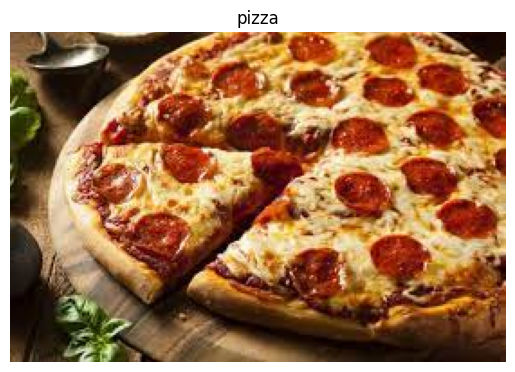

In [60]:
load_and_pred(model2,"pizza5.jpeg",class_names)

1/1 [==============================] - 0s 44ms/step
[[0.51452994]]


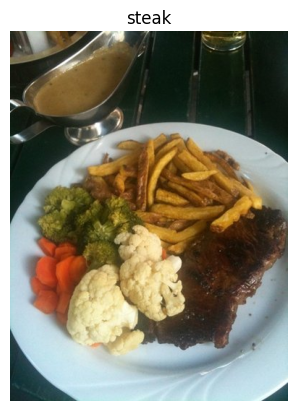

In [63]:
load_and_pred(model2,"steak8.jpg",class_names)

1/1 [==============================] - 0s 55ms/step
[[0.42591724]]


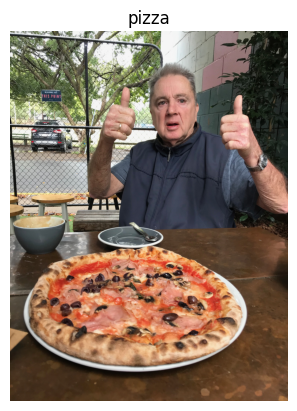

In [65]:
load_and_pred(model2,"pizza1.jpeg",class_names)

In [66]:
# Save the model
model2.save("food_CNN.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
